# 0. Load libraries

In [3]:
%matplotlib inline
import src.twogaussian as two_g
import src.muller as muller
import src.components as cmpnt
import os.path
import numpy as np

# 1. Load or build dataset
Here we either load a previously prepared dataset, or create it

In [10]:
# USER-DEFINED PARAMETERS 
# 'two_g': OpenMM trajectory of one particle in a 2-gaussian 3D potential
# 'muller': OpenMM trajectory of one particle in Muller 2+1D potential
# 'reload': traj stored previously in datafile
run='reload'
n_steps = 1000 # 10000
# datafile is optional if run != 'reload'. It will be written if run == 'muller'
datafile='muller_traj_1000_v3.npy' #'muller_traj_1000.npy'
#
# !!!! USER DO NOT NEED TO EDIT BELOW !!!
if(run=='two_g'):
    print(run)
    two_g.plot_pot()                # plot 2D slice in 3D potential map
    traj = two_g.propagate(n_steps) # build traj
    two_g.plot_traj(traj)           # show traj
elif(run=='muller'):
    print(run)
    traj = muller.propagate_muller(nParticles=1,n_steps=n_steps) # build traj
    traj_xy = traj[:,0:2]
    traj_mean = np.mean(traj_xy,axis=0)
    traj = traj_xy - traj_mean.T
    np.save(datafile,traj)
elif(run=='reload'):
    print(run)
    if(os.path.exists(datafile)):
        traj = np.load(datafile) # load traj
    else:
        print('not found: ',datafile)
else:
    print('option not recognized')
# !!! END OF UGLY SECTION !!!

reload


# 2. Perform Component Analyses
Define here how many components you want to get!

In [11]:
n_components=2

### 2.1. Retrieve components (v_) and, when possible, associated eigenvalue (l_)

In [12]:
v_pca, l_pca  = cmpnt.get_pca(traj,n_components=n_components)
v_tica,l_tica = cmpnt.get_tica(traj,n_components=n_components,lag_time=100)
v_ica         = cmpnt.get_ica(traj,n_components=n_components)

### 2.2. Project data on components

In [13]:
prj_pca  = cmpnt.proj(v_pca,traj) 
prj_tica = cmpnt.proj(v_tica,traj)
prj_ica  = cmpnt.proj(v_ica,traj)

### 2.3. Measure negentropy of components

In [14]:
avenegent_pca, stdnegent_pca   = cmpnt.ave_score(prj_pca,n_components)
avenegent_tica, stdnegent_tica = cmpnt.ave_score(prj_tica,n_components)
avenegent_ica, stdnegent_ica   = cmpnt.ave_score(prj_ica,n_components)

### 2.4. Visualize population in component space

PCA


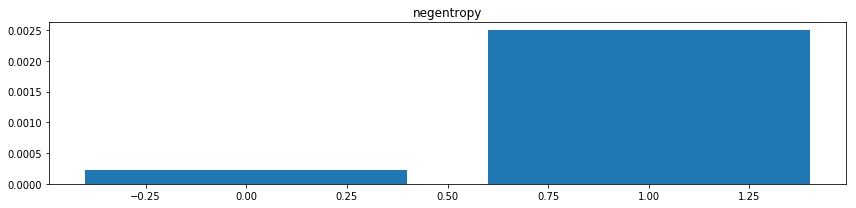

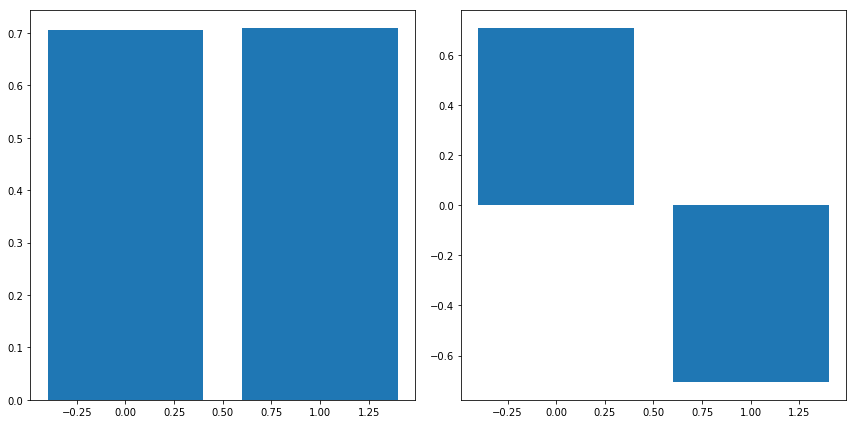

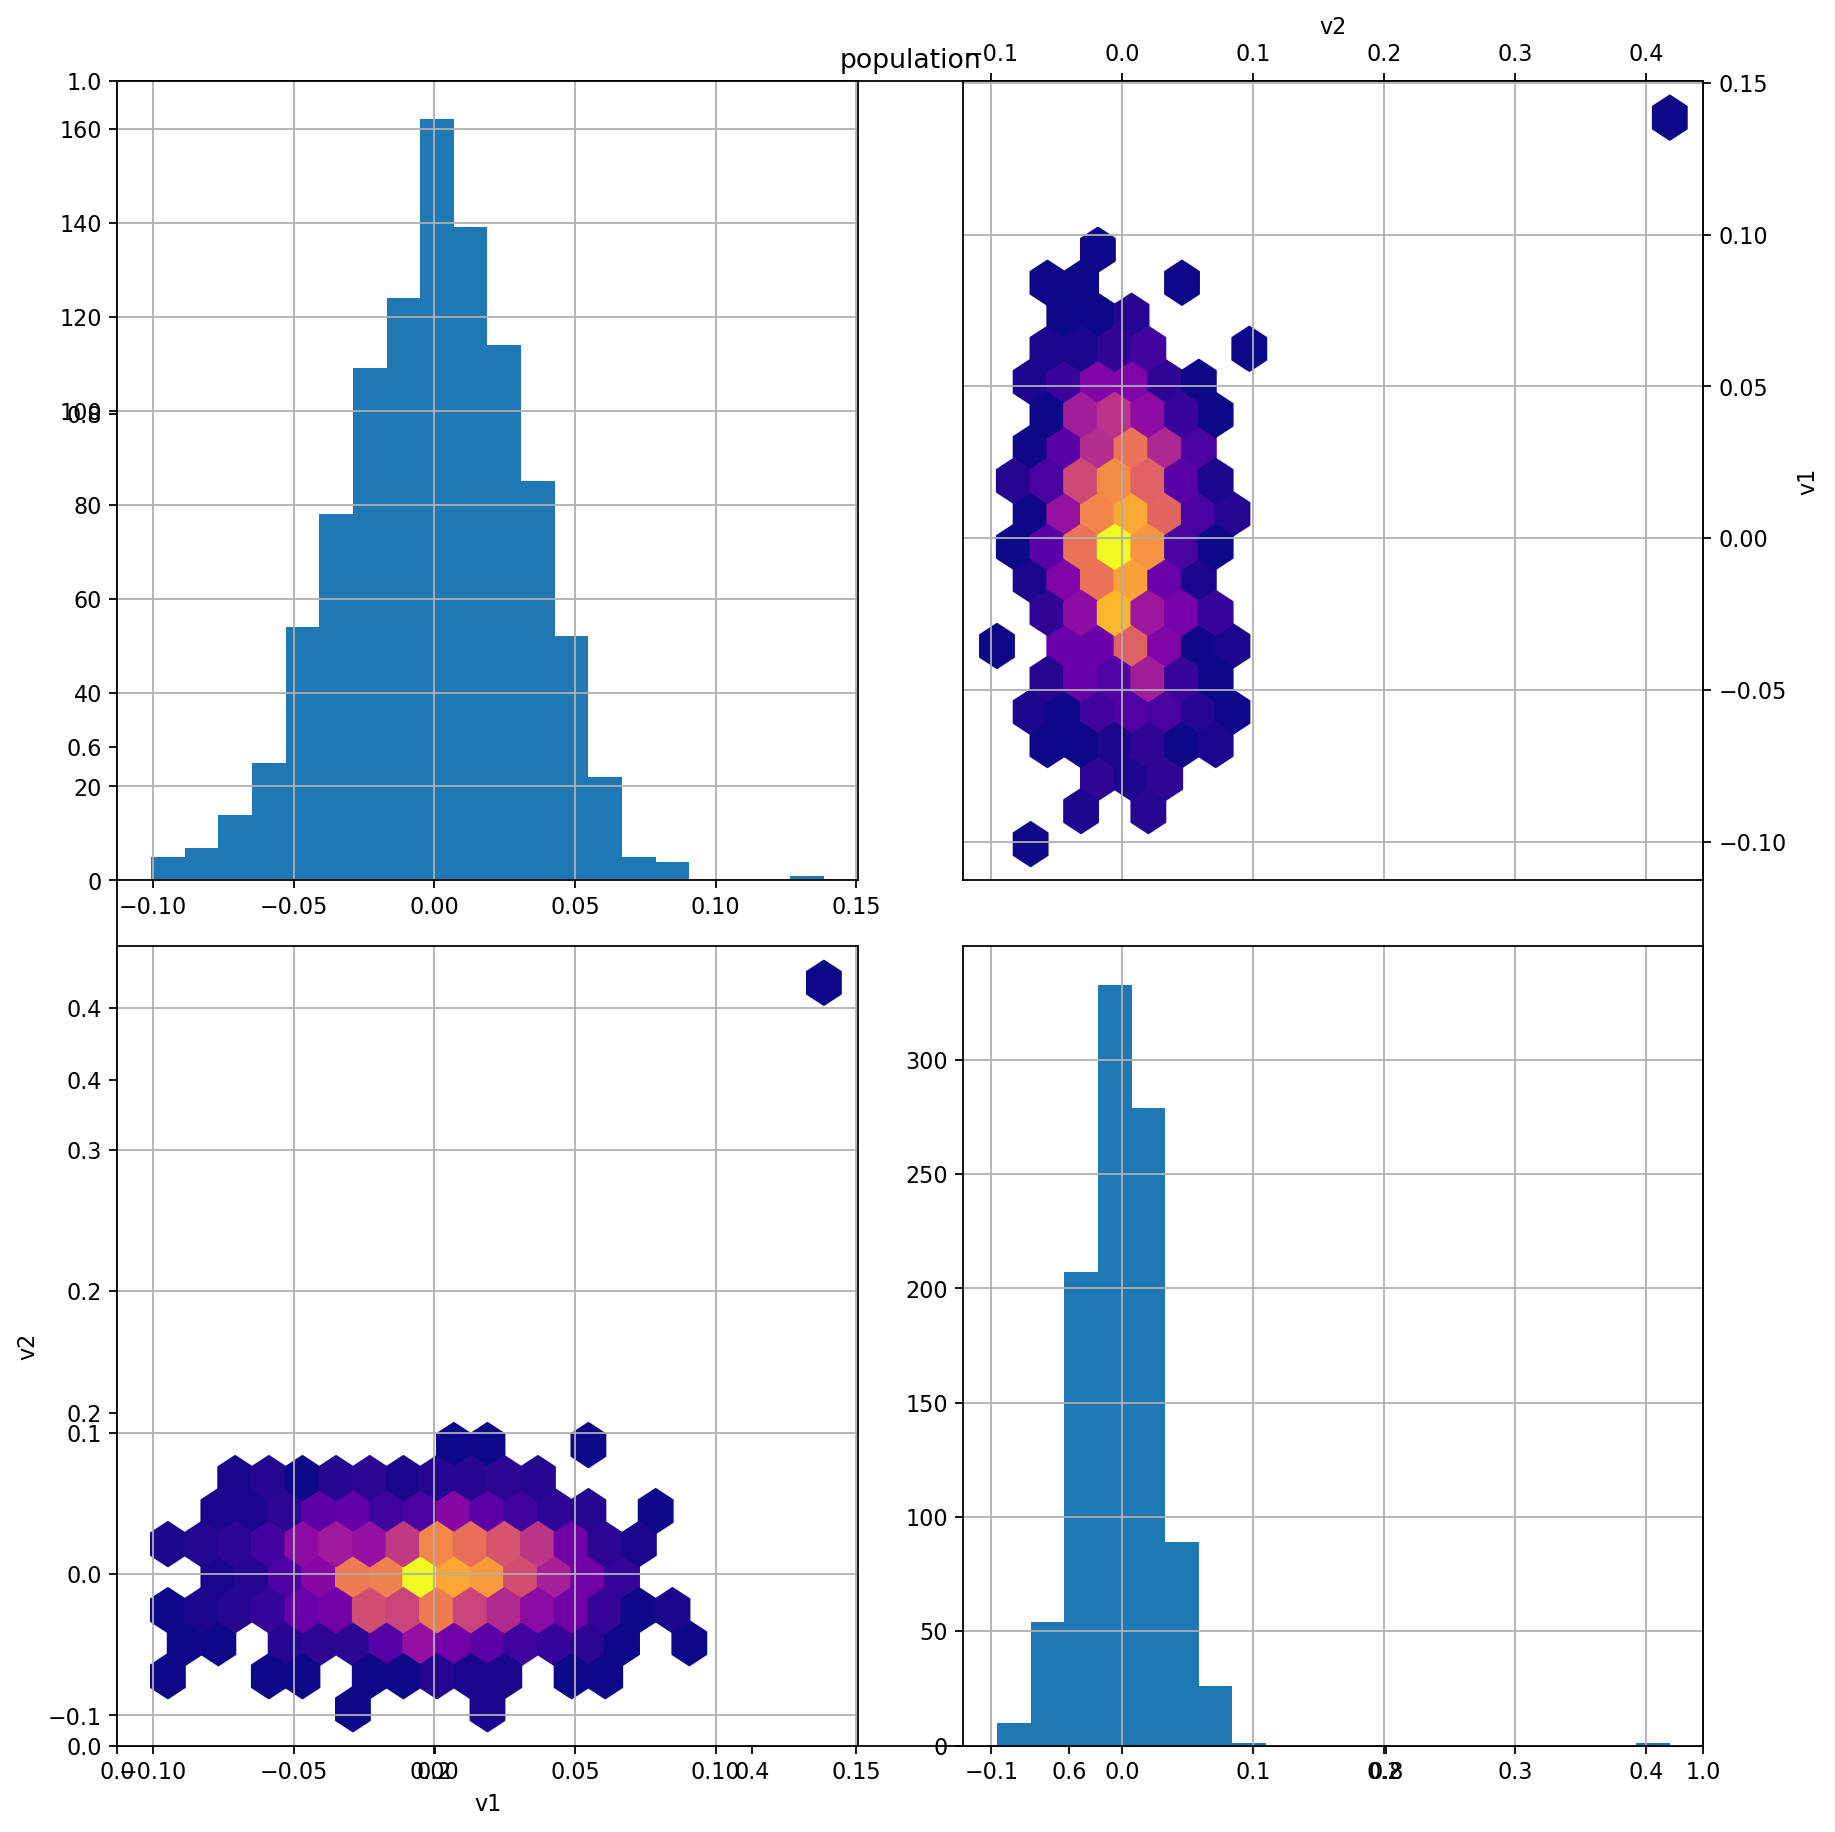

tICA


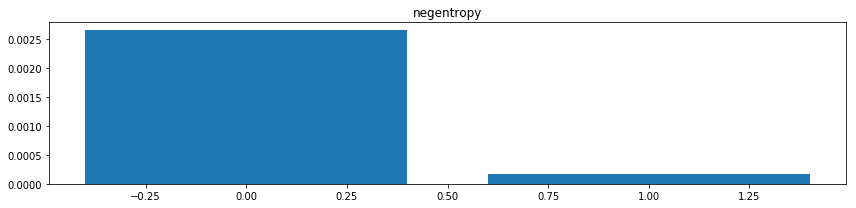

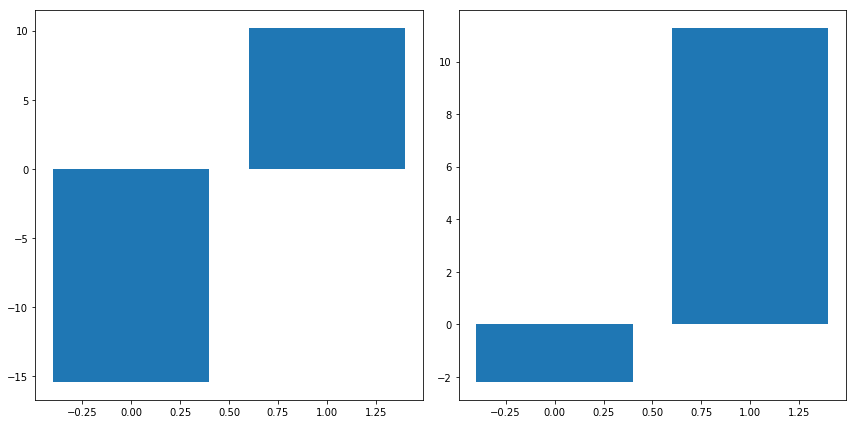

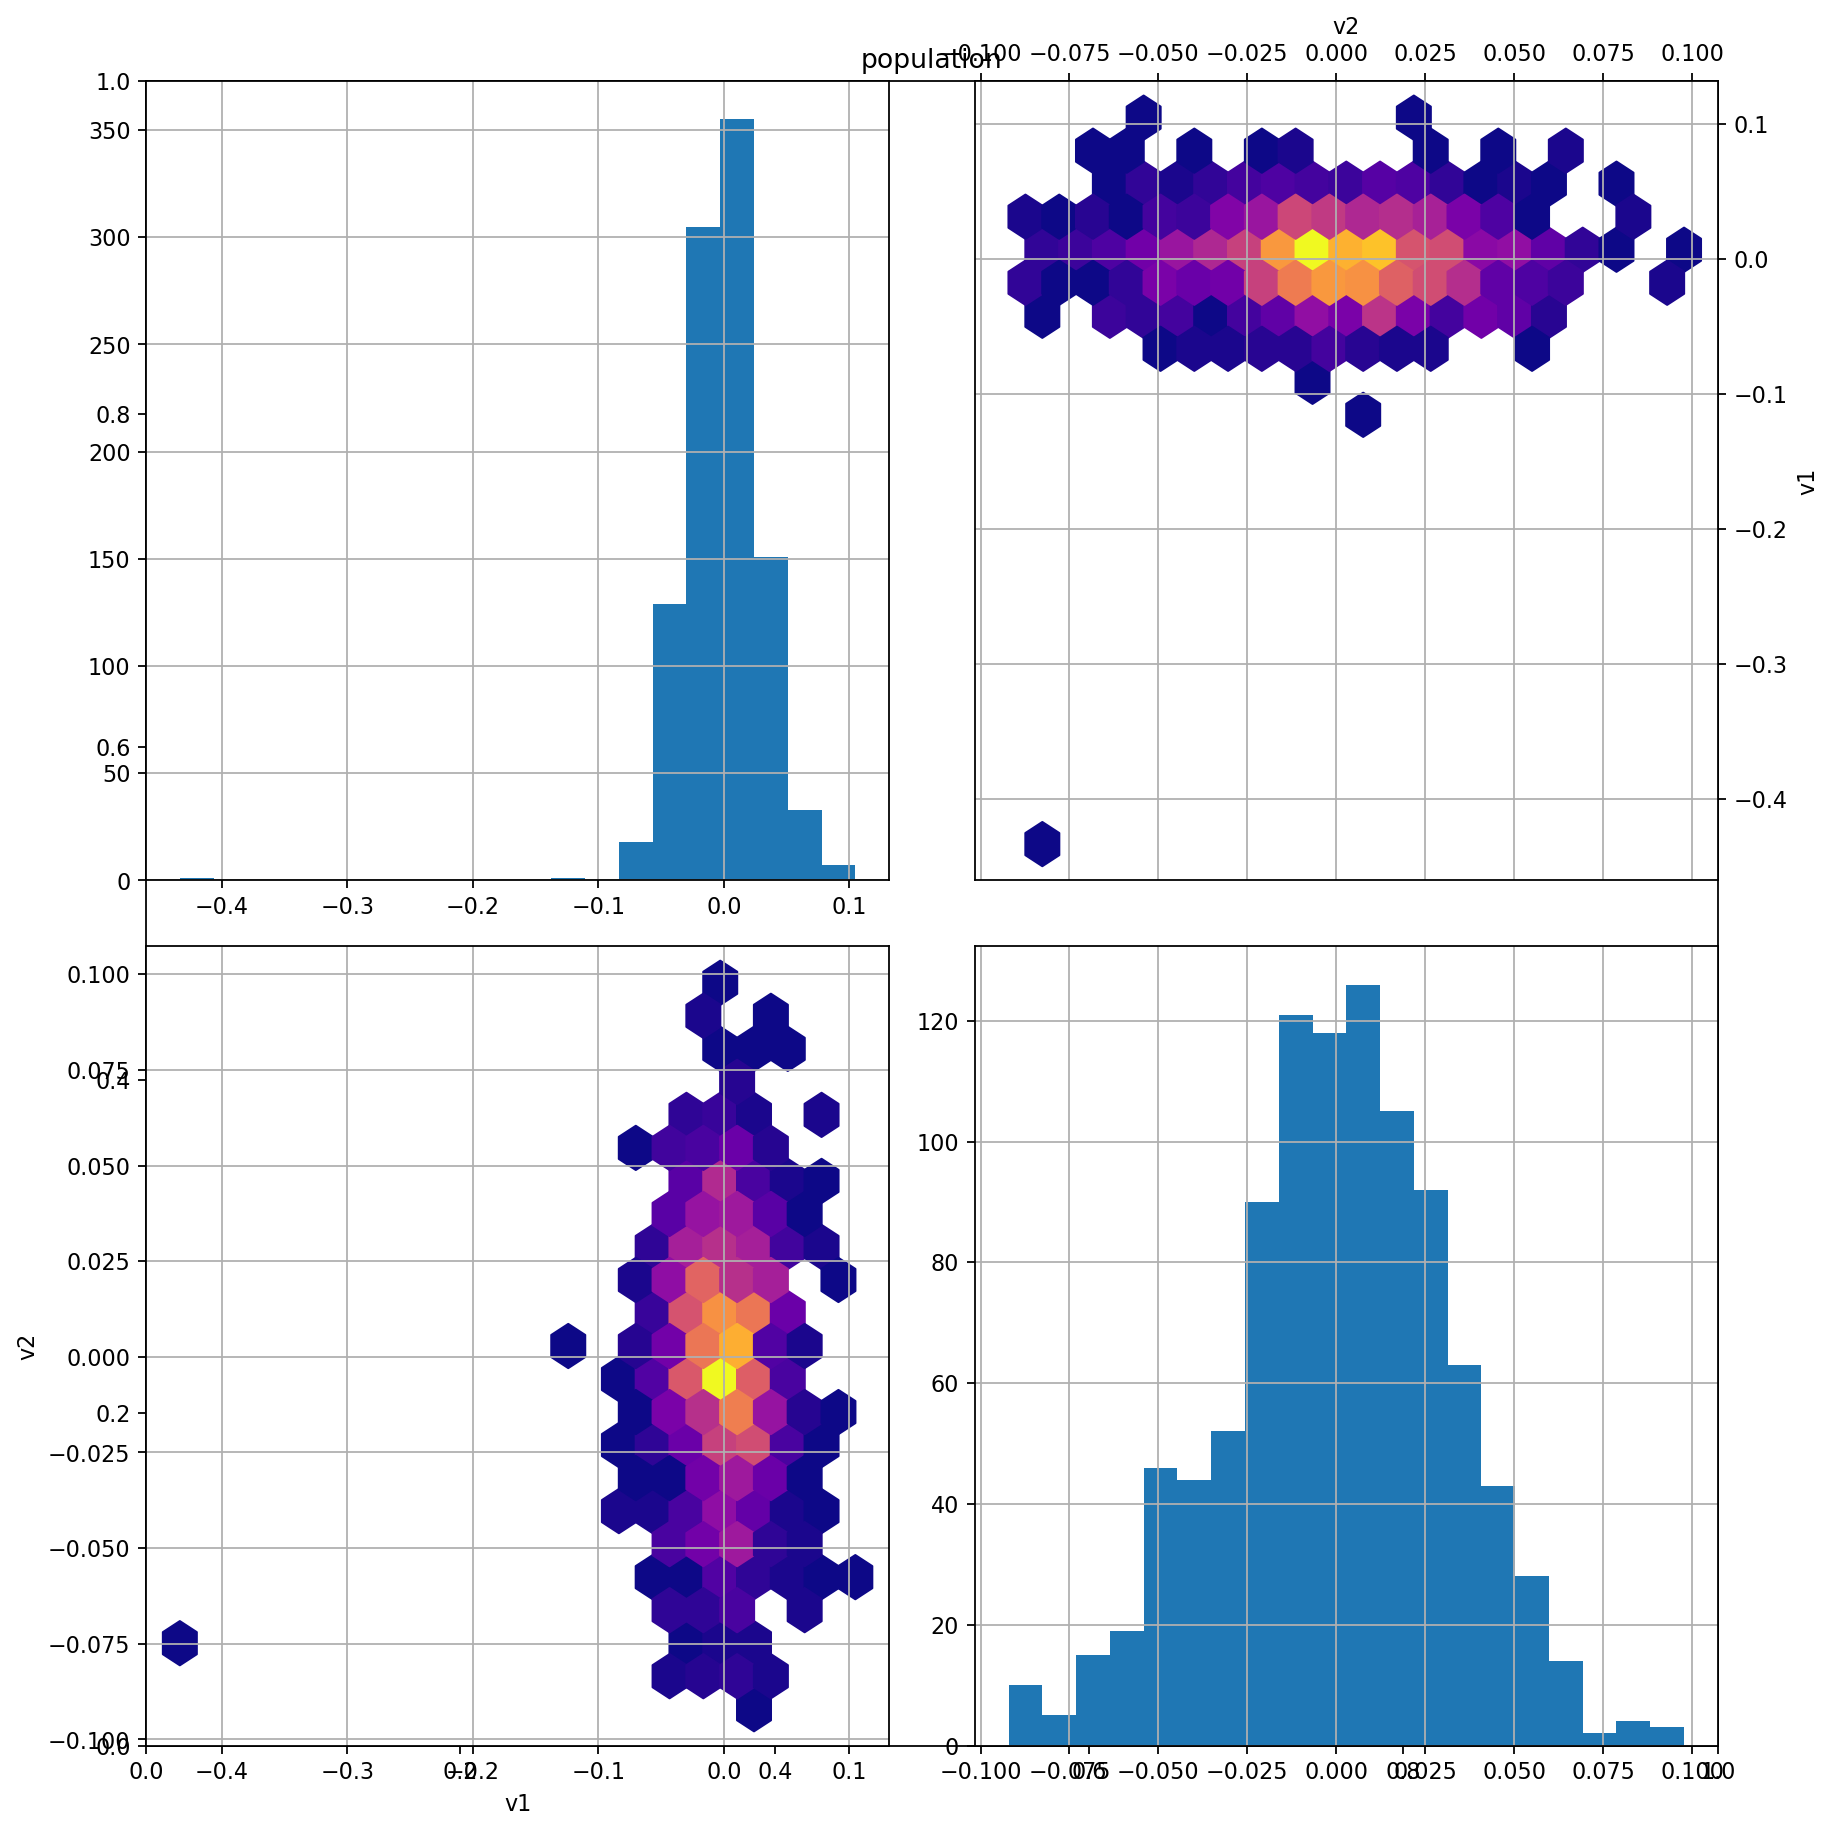

ICA


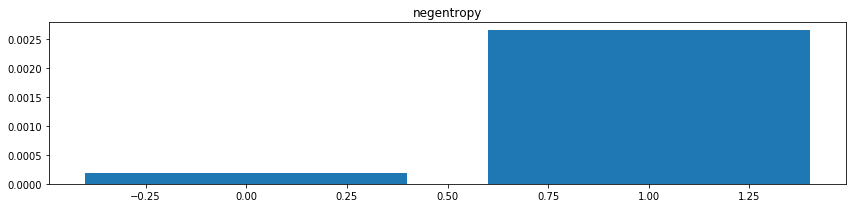

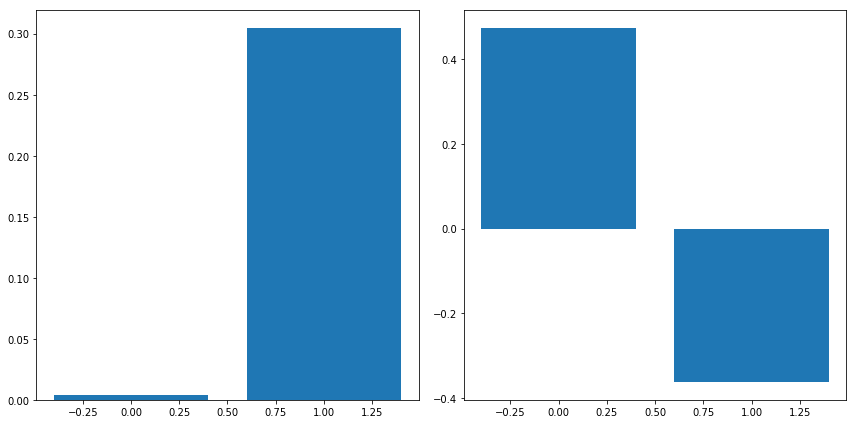

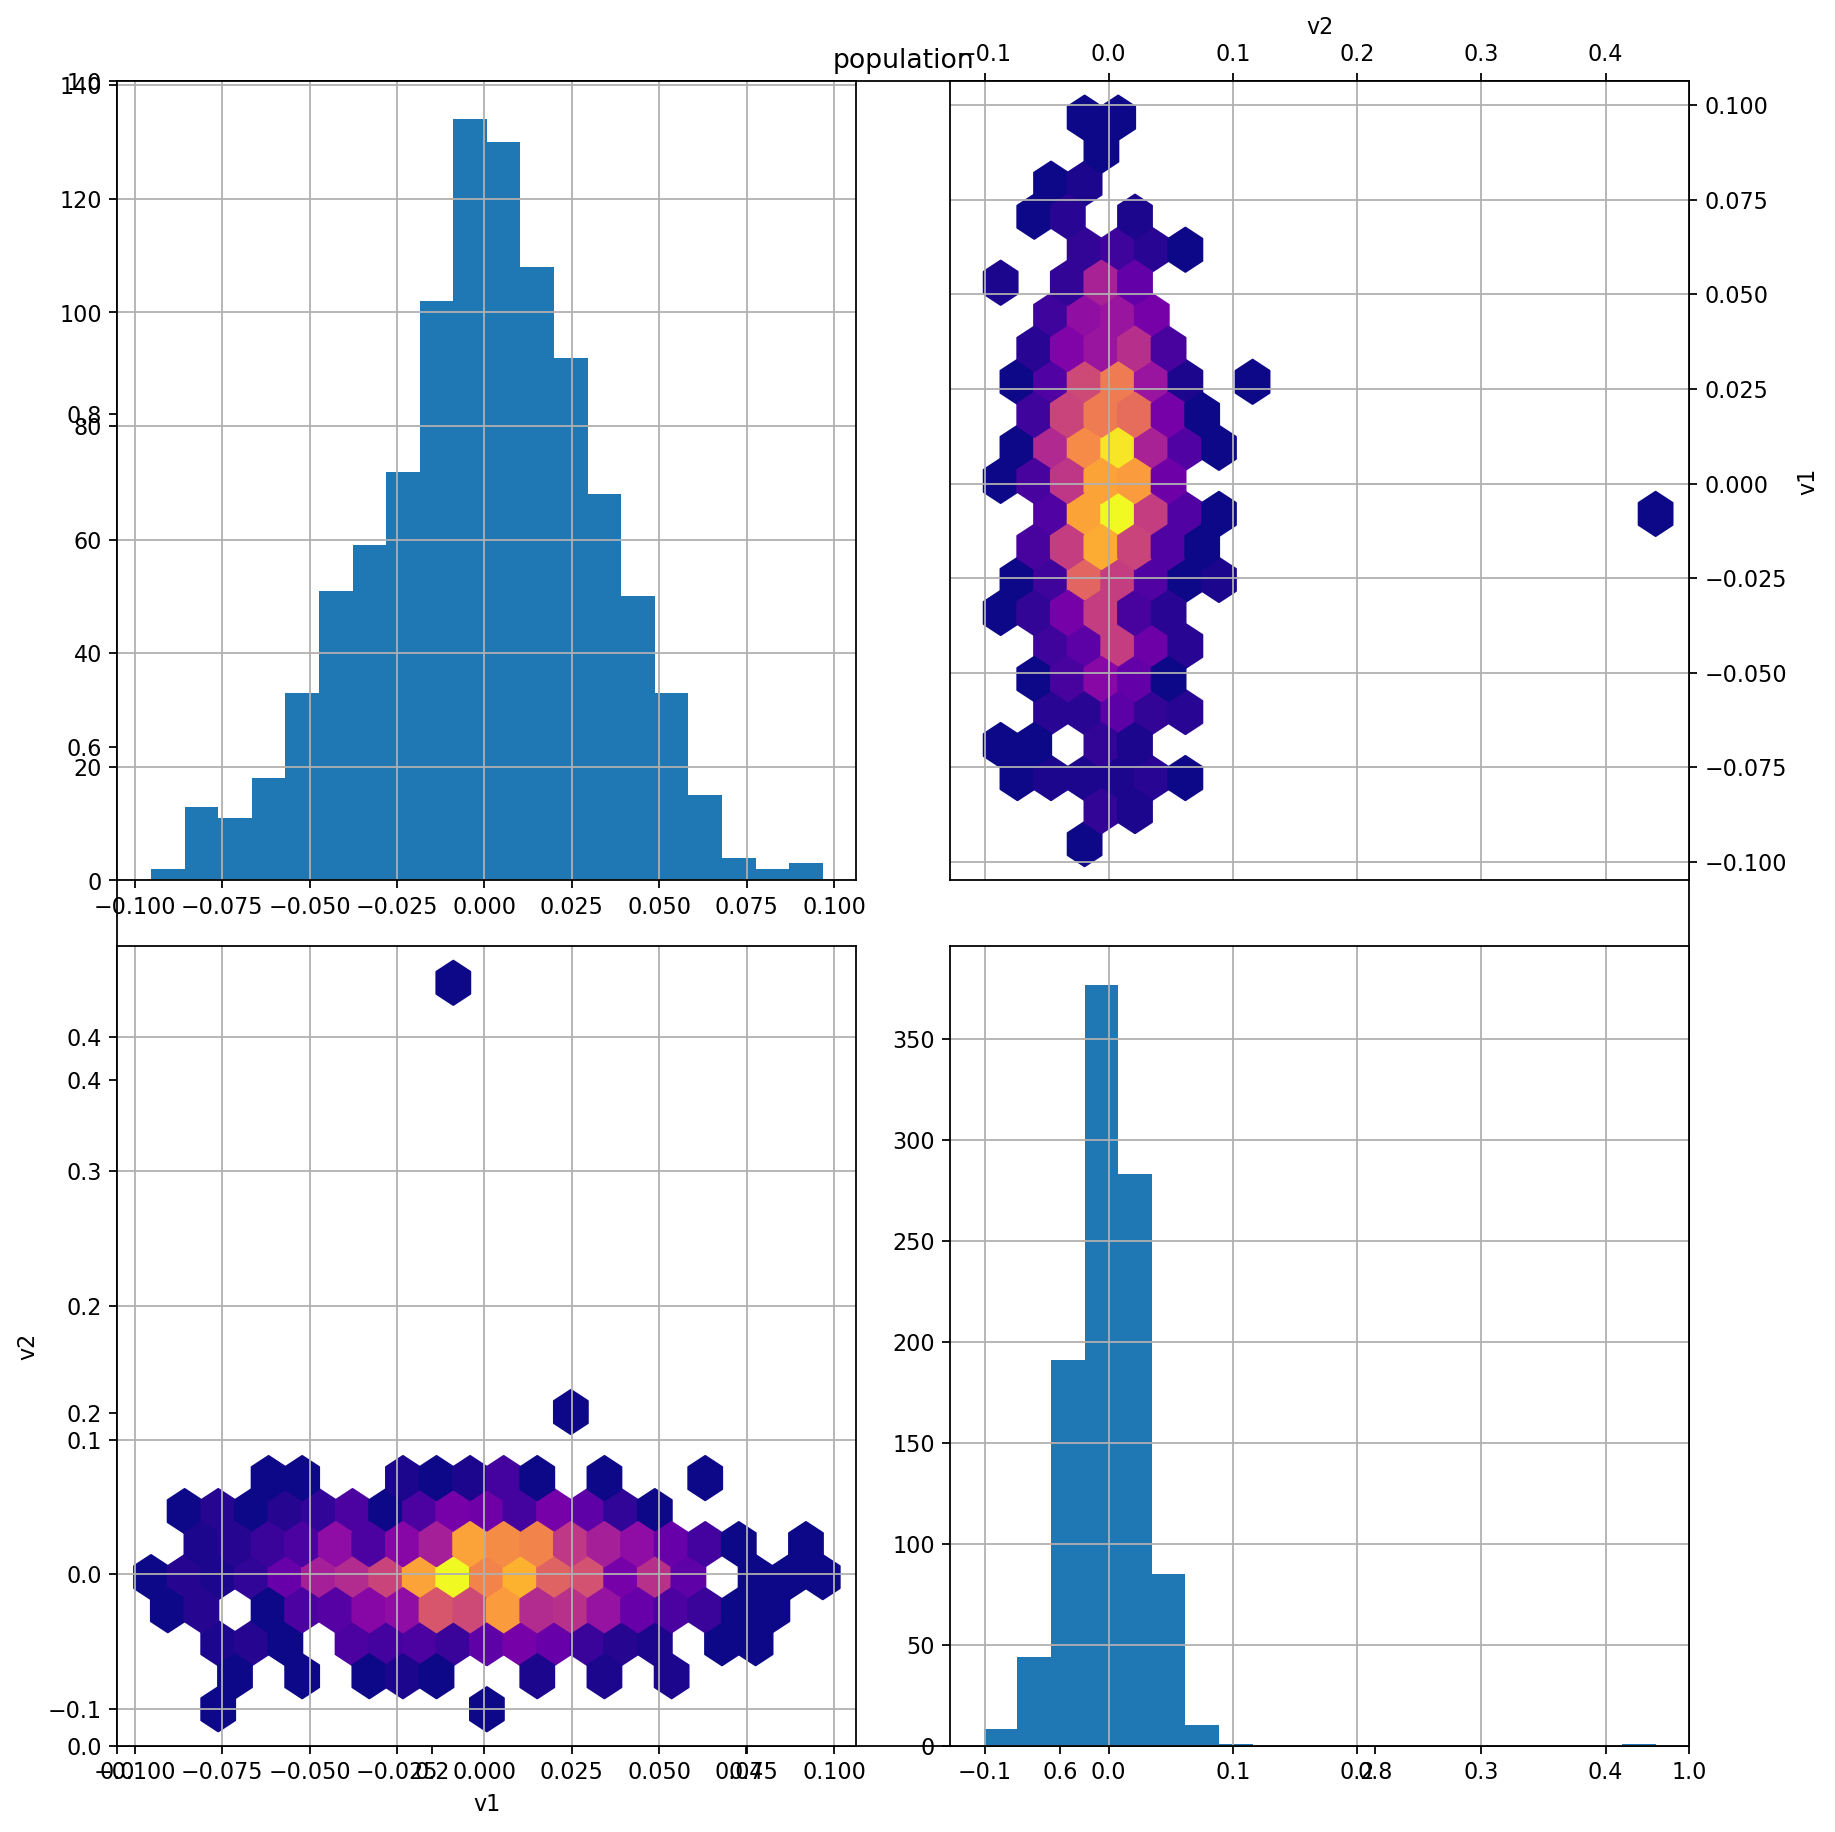

In [15]:
for v,prj,neg,title in [(v_pca,prj_pca,avenegent_pca,'PCA'),(v_tica,prj_tica,avenegent_tica,'tICA'),(v_ica,prj_ica,avenegent_ica,'ICA')]:
    cmpnt.plot_summary(v,prj,neg,n_components,title=title,nfig=3)
    